In [ ]:
train = pd.read_csv('train.tsv', sep="\t")
test = pd.read_csv('test.tsv', sep="\t")
 
train_original = train.copy()
test_original = test.copy()
 
 
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
 
from nltk import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
 
 
%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
print(train["SentenceId"].value_counts())

1       63
5555    63
509     59
625     58
403     57
        ..
8451     1
5718     1
3560     1
1666     1
1178     1
Name: SentenceId, Length: 8529, dtype: int64


[1 2 3 4 0]


Text(0.5, 1.0, 'Sentiment count in train set')

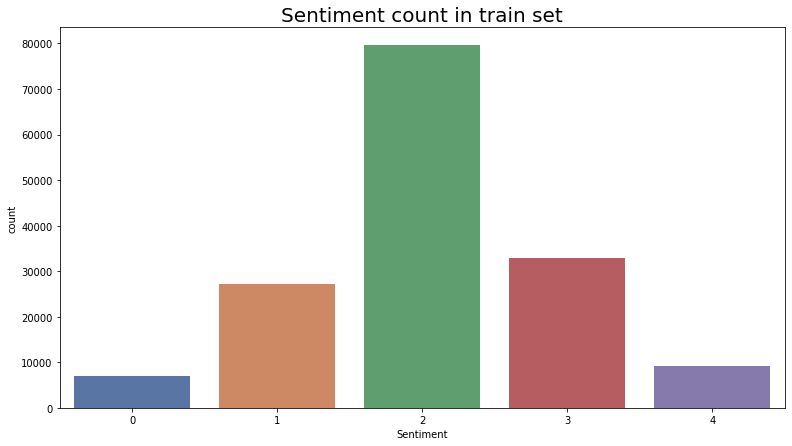

In [ ]:
print(train["Sentiment"].unique())

plt.rcParams['figure.figsize'] = (13, 7)

#sns.set(style="white")

sns.countplot(train["Sentiment"], palette='deep')

plt.title('Sentiment count in train set', fontsize = 20)

In [ ]:
def Preprocess(df):


    for i in df['Phrase']:
        tokenizer = nltk.RegexpTokenizer(r"\w+")
        i = tokenizer.tokenize(i)

        
#---------------------------------------------------------------------------------------------------------------
        
    tokenized_review_1 = df['Phrase'].apply(lambda x: x.split())
    


#---------------------------------------------------------------------------------------------------------------



    ps = PorterStemmer()
    WL = WordNetLemmatizer()

    stemmed_review = tokenized_review_1.apply(lambda x: [ps.stem(i) for i in x])
    lemmatized_review = tokenized_review_1.apply(lambda x: [WL.lemmatize(i) for i in x])


#---------------------------------------------------------------------------------------------------------------


    stop = stopwords.words('english')
    stemmed_review = stemmed_review.apply(lambda x: [item for item in x if item not in stop])
    lemmatized_review = lemmatized_review.apply(lambda x: [item for item in x if item not in stop])

    



#---------------------------------------------------------------------------------------------------------------

    for i in range(len(stemmed_review)):
        stemmed_review[i] = ' '.join(stemmed_review[i])

    df['stemmed_review'] = stemmed_review

    
    for i in range(len(lemmatized_review)):
        lemmatized_review[i] = ' '.join(lemmatized_review[i])

    df['lemmatized_review'] = lemmatized_review



    df = df[df["stemmed_review"] != '']
    df = df[df["lemmatized_review"] != '']

In [ ]:
Preprocess(train)

In [ ]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment,stemmed_review,lemmatized_review
0,1,1,A series of escapades demonstrating the adage ...,1,A seri escapad demonstr adag good goos also go...,A series escapade demonstrating adage good goo...
1,2,1,A series of escapades demonstrating the adage ...,2,A seri escapad demonstr adag good goos,A series escapade demonstrating adage good goose
2,3,1,A series,2,A seri,A series
3,4,1,A,2,A,A
4,5,1,series,2,seri,series


In [ ]:
print("normal")
print("-"*100)

print(train['Phrase'][0])
print("\nafter stemming")
print("-"*100)

print(train['stemmed_review'][0])

print("\nafter lemmatizing")
print("-"*100)
print(train['lemmatized_review'][0])

normal
----------------------------------------------------------------------------------------------------
A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .

after stemming
----------------------------------------------------------------------------------------------------
A seri escapad demonstr adag good goos also good gander , occasion amus none amount much stori .

after lemmatizing
----------------------------------------------------------------------------------------------------
A series escapade demonstrating adage good goose also good gander , occasionally amuses none amount much story .


plot_train = train.copy()
plot_train

In [ ]:
plot_train["Sentiment"].unique()

array([1, 2, 3, 4, 0])

In [ ]:
positive_words = plot_train[plot_train["Sentiment"] !=  0 ]
positive_words = positive_words[positive_words["Sentiment"] !=  1 ]
positive_words = positive_words[positive_words["Sentiment"] !=  2 ]



negative_words = plot_train[plot_train["Sentiment"] !=  3 ]
negative_words = negative_words[negative_words["Sentiment"] !=  4 ]
negative_words = negative_words[negative_words["Sentiment"] !=  2 ]

In [ ]:
negative_words["Sentiment"].unique()

array([1, 0])

In [ ]:
print(negative_words.shape)
print(positive_words.shape)

(34345, 6)
(42133, 6)


In [ ]:
plot_all_words = ' '.join(text for text in train['lemmatized_review'])

plot_positive_words = ' '.join(text for text in positive_words['lemmatized_review'])

plot_negative_words = ' '.join(text for text in negative_words['lemmatized_review'])

plot_positive_words[0:1000]

'good goose good amuses This quiet , introspective entertaining independent worth seeking . This quiet , introspective entertaining independent quiet , introspective entertaining independent quiet , introspective entertaining , introspective entertaining introspective entertaining introspective entertaining worth seeking . worth seeking fan A positively thrilling combination ethnography intrigue , betrayal , deceit murder Shakespearean tragedy juicy soap opera . A positively thrilling combination ethnography intrigue , betrayal , deceit murder Shakespearean tragedy juicy soap opera A positively thrilling combination ethnography intrigue , betrayal , deceit murder A positively thrilling combination positively thrilling combination positively thrilling combination thrilling intrigue juicy soap opera juicy soap opera juicy A comedy-drama nearly epic proportion rooted sincere performance title character undergoing midlife crisis . A comedy-drama nearly epic proportion nearly epic proportio

In [ ]:
plot_negative_words[0:1000]

"A series escapade demonstrating adage good goose also good gander , occasionally amuses none amount much story . gander , occasionally amuses none amount much story none amount much story none amount much story Even fan Ismail Merchant 's work , I suspect , would hard time sitting one . , I suspect , would hard time sitting one . would hard time sitting one . would hard time sitting one hard time sitting one hard time sitting one hard time hard time sitting one intrigue , betrayal , deceit murder betrayal , deceit murder , deceit murder deceit murder deceit murder Shakespearean tragedy tragedy soap opera Aggressive self-glorification manipulative whitewash . Aggressive self-glorification manipulative whitewash self-glorification manipulative whitewash self-glorification manipulative whitewash manipulative whitewash midlife crisis Narratively , Trouble Every Day plodding mess . , Trouble Every Day plodding mess . Trouble Every Day plodding mess . Trouble plodding mess . plodding mess p

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer="word")),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

x_train,x_test,y_train,y_test = train_test_split(train['stemmed_review'], train['Sentiment'], test_size=0.2)

pipeline.fit(x_train,y_train)
predictions = pipeline.predict(x_test)
print(classification_report(predictions,y_test))
print("-"*100)
print(confusion_matrix(predictions,y_test))
print("-"*100)
print(pipeline.score(x_train,y_train))
print(accuracy_score(predictions,y_test))

              precision    recall  f1-score   support

           0       0.29      0.48      0.36       860
           1       0.41      0.50      0.45      4392
           2       0.81      0.68      0.74     18854
           3       0.48      0.52      0.50      6068
           4       0.28      0.49      0.35      1038

    accuracy                           0.61     31212
   macro avg       0.45      0.53      0.48     31212
weighted avg       0.65      0.61      0.63     31212

----------------------------------------------------------------------------------------------------
[[  410   315   128     4     3]
 [  652  2215  1238   256    31]
 [  328  2615 12766  2830   315]
 [   34   302  1572  3175   985]
 [    4    17   132   379   506]]
----------------------------------------------------------------------------------------------------
0.6590333845956683
0.6110470331923619


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

x_train,x_test,y_train,y_test = train_test_split(train['lemmatized_review'], train['Sentiment'], test_size=0.2)

pipeline.fit(x_train,y_train)
predictions = pipeline.predict(x_test)
print(classification_report(predictions,y_test))
print("-"*100)
print(confusion_matrix(predictions,y_test))
print("-"*100)
print(pipeline.score(x_train,y_train))
print(accuracy_score(predictions,y_test))

              precision    recall  f1-score   support

           0       0.29      0.45      0.35       951
           1       0.41      0.49      0.45      4555
           2       0.79      0.69      0.73     18321
           3       0.48      0.51      0.50      6262
           4       0.29      0.47      0.36      1123

    accuracy                           0.61     31212
   macro avg       0.45      0.52      0.48     31212
weighted avg       0.64      0.61      0.62     31212

----------------------------------------------------------------------------------------------------
[[  428   356   153    13     1]
 [  651  2231  1401   247    25]
 [  334  2462 12556  2689   280]
 [   49   323  1730  3172   988]
 [    8    21   130   433   531]]
----------------------------------------------------------------------------------------------------
0.6711040625400487
0.6061130334486736


In [ ]:
Preprocess(test)

test.head()

,PhraseId,SentenceId,Phrase,stemmed_review,lemmatized_review
0,156061,8545,An intermittently pleasing but mostly routine ...,An intermitt pleas mostli routin effort .,An intermittently pleasing mostly routine effo...
1,156062,8545,An intermittently pleasing but mostly routine ...,An intermitt pleas mostli routin effort,An intermittently pleasing mostly routine effort
2,156063,8545,An,An,An
3,156064,8545,intermittently pleasing but mostly routine effort,intermitt pleas mostli routin effort,intermittently pleasing mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine,intermitt pleas mostli routin,intermittently pleasing mostly routine


In [ ]:
x_train_n_b = train["stemmed_review"]
y_train_n_b = train["Sentiment"]
x_test_n_b = test["stemmed_review"]

In [ ]:
pipeline.fit(x_train_n_b,y_train_n_b)
predictions = pipeline.predict(x_test_n_b)

print(pipeline.score(x_train_n_b,y_train_n_b))

0.6554273997180572


In [ ]:
test["Sentiment"] = predictions
test["Sentiment"].value_counts()

2    44112
3    12166
1     7532
4     1631
0      851
Name: Sentiment, dtype: int64

In [ ]:
n_b_data = pd.concat([train, test], ignore_index=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

x_train,x_test,y_train,y_test = train_test_split(n_b_data['stemmed_review'], n_b_data['Sentiment'], test_size=0.2, random_state=42)

pipeline.fit(x_train,y_train)
n_b_predictions = pipeline.predict(x_test)
print(classification_report(n_b_predictions,y_test))
print("-"*100)
print(confusion_matrix(n_b_predictions,y_test))
print("-"*100)
print(pipeline.score(x_train,y_train))
print(accuracy_score(n_b_predictions,y_test))

              precision    recall  f1-score   support

           0       0.28      0.50      0.36       879
           1       0.49      0.60      0.54      5641
           2       0.86      0.76      0.81     27941
           3       0.59      0.61      0.60      8770
           4       0.31      0.56      0.40      1240

    accuracy                           0.70     44471
   macro avg       0.51      0.61      0.54     44471
weighted avg       0.73      0.70      0.71     44471

----------------------------------------------------------------------------------------------------
[[  439   311   110    14     5]
 [  656  3388  1351   216    30]
 [  406  2837 21172  3131   395]
 [   48   375  1837  5381  1129]
 [    8    24   168   345   695]]
----------------------------------------------------------------------------------------------------
0.7302128951377607
0.6987699849340019
